<a href="https://colab.research.google.com/github/HimanshuNarkhede/codsoft/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
df = pd.read_csv('events.csv')

print(df.describe())

                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
4  2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   

                   category_code        brand   price       user_id  \
0          electronics.telephone          NaN   31.90  1.515916e+18   
1    computers.components.cooler       zalman   17.16  1.515916e+18   
2                            NaN          NaN    9.81  1.515916e+18   
3  computers.peripherals.printer       pantum  113.81  1.515916e+18   
4                            NaN  cameronsino   15.87  1.515916e+18   

  user_session  
0   LJuJVLEjPT  
1   tdicluNnRY  
2   4TMArHtXQy  
3   aGFYrNgC08  
4   aa4mmk0kwQ  
<class 'pandas.core.frame.

In [4]:
print(df.head())


                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
4  2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   

                   category_code        brand   price       user_id  \
0          electronics.telephone          NaN   31.90  1.515916e+18   
1    computers.components.cooler       zalman   17.16  1.515916e+18   
2                            NaN          NaN    9.81  1.515916e+18   
3  computers.peripherals.printer       pantum  113.81  1.515916e+18   
4                            NaN  cameronsino   15.87  1.515916e+18   

  user_session  
0   LJuJVLEjPT  
1   tdicluNnRY  
2   4TMArHtXQy  
3   aGFYrNgC08  
4   aa4mmk0kwQ  


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337088 entries, 0 to 337087
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     337088 non-null  object 
 1   event_type     337088 non-null  object 
 2   product_id     337088 non-null  int64  
 3   category_id    337088 non-null  int64  
 4   category_code  238672 non-null  object 
 5   brand          251887 non-null  object 
 6   price          337087 non-null  float64
 7   user_id        337087 non-null  float64
 8   user_session   337018 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 23.1+ MB
None


In [6]:
df['event_time'] = pd.to_datetime(df['event_time'])
last_event_date = df['event_time'].max()
df['days_since_last_event'] = (last_event_date - df['event_time']).dt.days

In [7]:
df['is_churned'] = df['days_since_last_event'].apply(lambda x: 1 if x > 30 else 0)


In [8]:
features = df.groupby('user_id').agg(
    recency=('days_since_last_event', 'min'),
    frequency=('event_type', 'count'),
    monetary=('price', 'sum')
).reset_index()

In [9]:
features = features.merge(
    df.groupby('user_id')['is_churned'].max().reset_index(),
    on='user_id'
)

In [10]:
features.fillna(0, inplace=True)
X = features[['recency', 'frequency', 'monetary']]
y = features['is_churned']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [15]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('AUC Score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12564
           1       0.96      0.91      0.94     11096

    accuracy                           0.94     23660
   macro avg       0.94      0.94      0.94     23660
weighted avg       0.94      0.94      0.94     23660

AUC Score: 0.9695864455889236


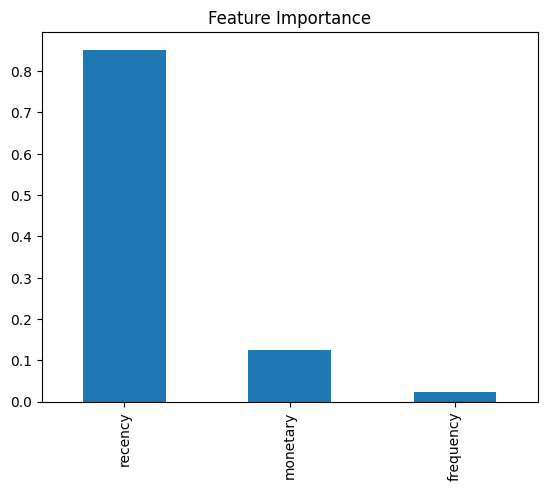

In [17]:
importance = pd.Series(clf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()